In [13]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Define paths
train_dir = "tree_dataset/training"
val_dir = "tree_dataset/validation"

# Preprocess images
def preprocess_image(image, label):
    image = tf.image.resize(image, (200, 200)) / 255.0  # Resize and normalize
    return image, label

# Load datasets using tf.keras.utils.image_dataset_from_directory
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(200, 200),
    batch_size=50
)

val_dataset = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=(200, 200),
    batch_size=50
)

# Apply preprocessing and optimize pipeline
train_dataset = train_dataset.map(preprocess_image).shuffle(1000).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.map(preprocess_image).prefetch(tf.data.AUTOTUNE)

# Define CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(200, 200, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
   layers.Dense(units=10, activation="softmax")
])


# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Print model summary
print(model.summary())

# Train the model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10
)


Found 683 files belonging to 3 classes.
Found 683 files belonging to 3 classes.


C:\Users\adarsh\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 198, 198, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 99, 99, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 97, 97, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 147456)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      18,874,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,895,178 (72.08 MB)

 Trainable params: 18,895,178 (72.08 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.2717 - loss: 4.5613 - val_accuracy: 0.5168 - val_loss: 1.1466
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.5386 - loss: 0.9859 - val_accuracy: 0.8214 - val_loss: 0.5043
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.7541 - loss: 0.5239 - val_accuracy: 0.9473 - val_loss: 0.2709
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.8838 - loss: 0.2704 - val_accuracy: 0.9722 - val_loss: 0.1142
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.9475 - loss: 0.1476 - val_accuracy: 0.6530 - val_loss: 0.9335
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.8129 - loss: 0.5469 - val_accuracy: 0.9327 - val_loss: 0.2074
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9693 - loss: 0.1609 - val_accuracy: 0.9898 - val_loss: 0.0714
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.9951 - loss: 0.0504 - val_accuracy: 0.9927 - val_

In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Load the test dataset and extract class names
test_dir = "tree_dataset/test"
test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(200, 200),
    batch_size=50
)

# Extract class names before processing the dataset
class_names = test_dataset.class_names

# Function for preprocessing images (normalization to [0, 1])
def preprocess_image(image, label):
    image = tf.cast(image, tf.float32)  # Convert to float32 if not already
    image = image / 255.0  # Normalize to [0, 1]
    return image, label

# Preprocess and prefetch the dataset
test_dataset = test_dataset.map(preprocess_image).prefetch(tf.data.AUTOTUNE)

# Confusion Matrix and Classification Report
y_pred = []
y_true = []
for image_batch, label_batch in test_dataset:
    predictions = model.predict(image_batch)
    y_pred.extend(np.argmax(predictions, axis=1))
    y_true.extend(label_batch.numpy())

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# Visualizing some predictions
plt.figure(figsize=(16, 30))
j = 1
for image, label in test_dataset.take(1):
    for i in range(30):  # Change this based on the batch size
        plt.subplot(10, 3, j)
        plt.imshow(image[i].numpy())  # Image should be between 0 and 1 after normalization
        prediction = model.predict(tf.expand_dims(image[i], axis=0), verbose=0)
        predicted_class = np.argmax(prediction)
        actual_class = label[i].numpy()
        plt.title(f"Pred: {predicted_class}\nActual: {actual_class}", fontsize=8)
        plt.axis('off')
        j += 1
plt.tight_layout()
plt.show()


NotFoundError: Could not find directory tree_dataset/test

Found 15 files belonging to 3 classes.
Test Loss: 0.0382
Test Accuracy: 100.0000%


InvalidArgumentError: {{function_node __wrapped__StridedSlice_device_/job:localhost/replica:0/task:0/device:CPU:0}} slice index 15 of dimension 0 out of bounds. [Op:StridedSlice] name: strided_slice/

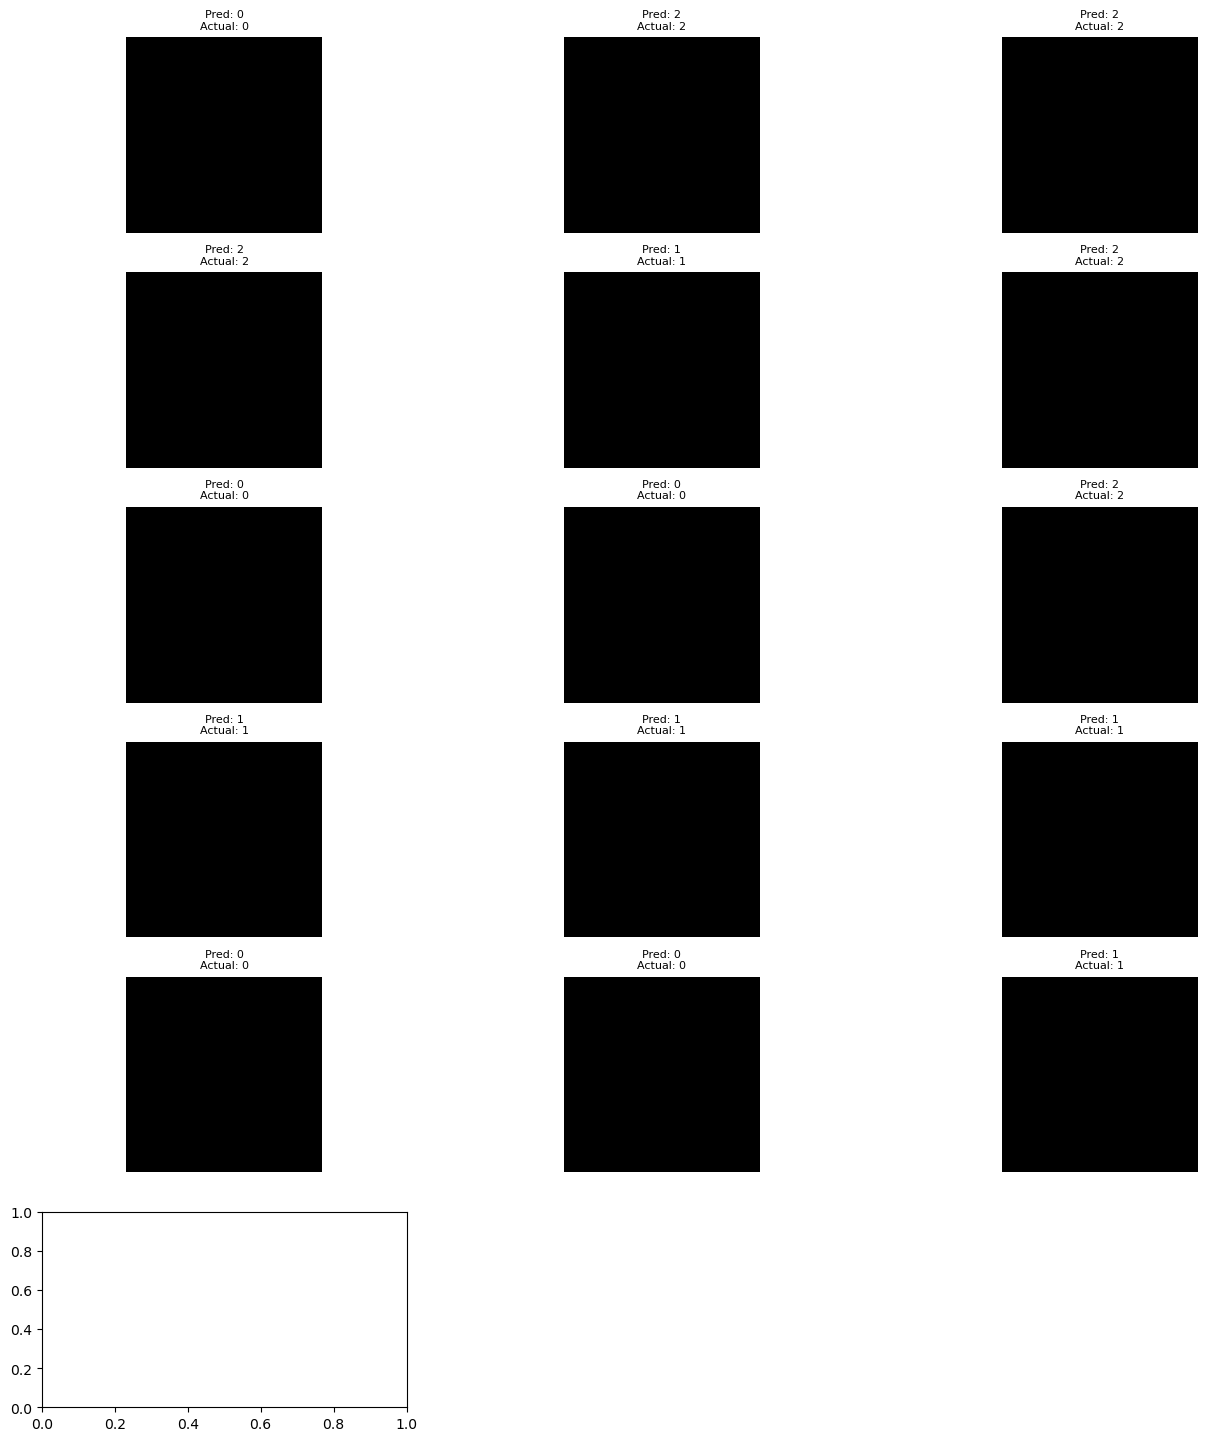

In [12]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Define the dataset directory
test_dir = r"C:\Users\adarsh\Downloads\GREEN AI\PROJECT\FASHION-MNIST-CLASSIFICATION\tree_dataset\testing"

# Load the dataset
test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(200, 200),
    batch_size=50
)

# Preprocess the dataset
test_dataset = test_dataset.map(preprocess_image).prefetch(tf.data.AUTOTUNE)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_dataset, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4%}")

# Visualize predictions
plt.figure(figsize=(16, 30))
j = 1
for image, label in test_dataset.take(1):
    for i in range(30):
        plt.subplot(10, 3, j)
        plt.imshow(image[i].numpy().astype("uint8"))
        prediction = model.predict(tf.expand_dims(image[i], axis=0), verbose=0)
        predicted_class = np.argmax(prediction)
        actual_class = label[i].numpy()
        plt.title(f"Pred: {predicted_class}\nActual: {actual_class}", fontsize=8)
        plt.axis('off')
        j += 1
plt.tight_layout()
plt.show()

# Generate predictions for confusion matrix and report
y_pred = []
y_true = []
for image_batch, label_batch in test_dataset:
    predictions = model.predict(image_batch, verbose=0)
    y_pred.extend(np.argmax(predictions, axis=1))
    y_true.extend(label_batch.numpy())

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
class_names = test_dataset.class_names

# Plot Confusion Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))


In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Define paths
train_dir = "tree_dataset/training"
val_dir = "tree_dataset/validation"

# Data Augmentation for better generalization
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2),
])

# Preprocess images
def preprocess_image(image, label):
    image = tf.image.resize(image, (200, 200)) / 255.0  # Resize and normalize
    return image, label

# Load datasets using tf.keras.utils.image_dataset_from_directory
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(200, 200),
    batch_size=50
)

val_dataset = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=(200, 200),
    batch_size=50
)

# Apply preprocessing and optimize pipeline
train_dataset = train_dataset.map(preprocess_image).shuffle(1000).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.map(preprocess_image).prefetch(tf.data.AUTOTUNE)

# Apply Data Augmentation to the training set
train_dataset = train_dataset.map(lambda x, y: (data_augmentation(x), y))

# Define CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(200, 200, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),  # Dropout layer to reduce overfitting
    layers.Dense(units=10, activation="softmax")
])

# Compile the model with a learning rate scheduler
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True
)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), 
              loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Print model summary
print(model.summary())

# Train the model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=15  # Increased epochs for better learning
)

# <---------------------- Test the Model ---------------------->

# Evaluate the model on the validation set
loss, accuracy = model.evaluate(val_dataset)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4%}")

# <---------------------- Model Prediction ---------------------->

# Get predictions for the validation dataset
y_pred = model.predict(val_dataset)

# Convert predictions from probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Get true labels from the validation dataset
y_true = np.concatenate([y for x, y in val_dataset], axis=0)

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred_labels)

# Plotting the confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_dataset.class_names, yticklabels=train_dataset.class_names)
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

# Generate and print the classification report
cr = classification_report(y_true, y_pred_labels, target_names=train_dataset.class_names)
print(cr)

Found 683 files belonging to 3 classes.
Found 683 files belonging to 3 classes.


C:\Users\adarsh\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 198, 198, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 99, 99, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 97, 97, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 46, 46, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 23, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 67712)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       8,667,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,761,802 (33.42 MB)

 Trainable params: 8,761,802 (33.42 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.2958 - loss: 1.9596 - val_accuracy: 0.4480 - val_loss: 1.0338
Epoch 2/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.4482 - loss: 1.1255 - val_accuracy: 0.3719 - val_loss: 1.0084
Epoch 3/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.6657 - loss: 0.7424 - val_accuracy: 0.8668 - val_loss: 0.5077
Epoch 4/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.7332 - loss: 0.6092 - val_accuracy: 0.5432 - val_loss: 0.8625
Epoch 5/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.8158 - loss: 0.4685 - val_accuracy: 0.7467 - val_loss: 0.4930
Epoch 6/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.8757 - loss: 0.3295 - val_accuracy: 0.7496 - val_loss: 0.5747
Epoch 7/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.9119 - loss: 0.2493 - val_accuracy: 0.8433 - val_loss: 0.3698
Epoch 8/15
14/14 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.8602 - loss: 0.3269 - val_accuracy: 0.5578 - val_

AttributeError: '_MapDataset' object has no attribute 'class_names'

<Figure size 1200x800 with 0 Axes>

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# <---------------------- Test the Model ---------------------->

# Evaluate the model on the validation set
loss, accuracy = model.evaluate(val_dataset)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4%}")

# <---------------------- Model Prediction ---------------------->

# Get predictions for the validation dataset
y_pred = model.predict(val_dataset)

# Convert predictions from probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Get true labels from the validation dataset
y_true = np.concatenate([y for x, y in val_dataset], axis=0)

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred_labels)

# Plotting the confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_dataset.class_names, yticklabels=train_dataset.class_names)
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

# Generate and print the classification report
cr = classification_report(y_true, y_pred_labels, target_names=train_dataset.class_names)
print(cr)

14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 560ms/step - accuracy: 0.7480 - loss: 0.5555
Test Loss: 0.5232
Test Accuracy: 75.1098%
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 613ms/step


AttributeError: '_MapDataset' object has no attribute 'class_names'

<Figure size 1200x800 with 0 Axes>

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# <---------------------- Test the Model ---------------------->

# Evaluate the model on the validation set
loss, accuracy = model.evaluate(val_dataset)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4%}")

# <---------------------- Model Prediction ---------------------->

# Get predictions for the validation dataset
y_pred = model.predict(val_dataset)

# Convert predictions from probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Get true labels from the validation dataset
y_true = np.concatenate([y for x, y in val_dataset], axis=0)

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred_labels)

# Plotting the confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_dataset.class_names, yticklabels=train_dataset.class_names)
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

# Generate and print the classification report
cr = classification_report(y_true, y_pred_labels, target_names=train_dataset.class_names)
print(cr)

14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 560ms/step - accuracy: 0.7480 - loss: 0.5555
Test Loss: 0.5232
Test Accuracy: 75.1098%
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 613ms/step


AttributeError: '_MapDataset' object has no attribute 'class_names'

<Figure size 1200x800 with 0 Axes>

14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 549ms/step - accuracy: 0.7543 - loss: 0.5263
Test Loss: 0.5232
Test Accuracy: 75.1098%
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 518ms/step


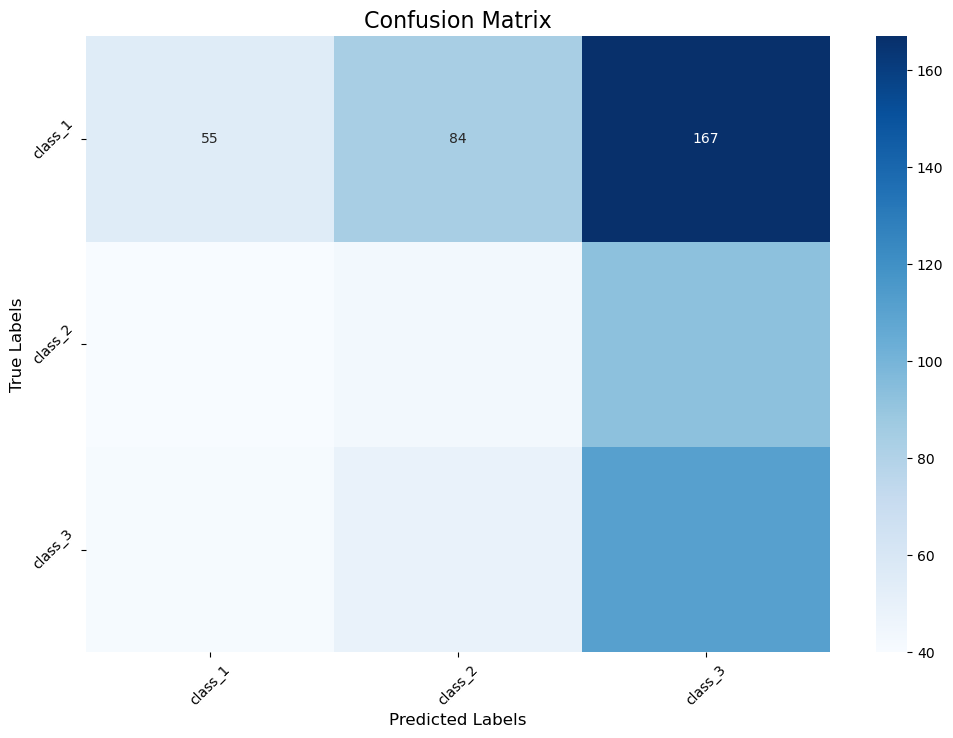

              precision    recall  f1-score   support

     class_1       0.40      0.18      0.25       306
     class_2       0.24      0.24      0.24       176
     class_3       0.30      0.55      0.39       201

    accuracy                           0.31       683
   macro avg       0.32      0.33      0.29       683
weighted avg       0.33      0.31      0.29       683



In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# <---------------------- Test the Model ---------------------->

# Evaluate the model on the validation set
loss, accuracy = model.evaluate(val_dataset)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4%}")

# <---------------------- Model Prediction ---------------------->

# Get predictions for the validation dataset
y_pred = model.predict(val_dataset)

# Convert predictions from probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Get true labels from the validation dataset
y_true = np.concatenate([y for x, y in val_dataset], axis=0)

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred_labels)

# Example class names (replace with your dataset's actual class names)
class_names = ['class_1', 'class_2', 'class_3']

# Plotting the confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

# Generate and print the classification report
cr = classification_report(y_true, y_pred_labels, target_names=class_names)
print(cr)


TESTING 1 


Found 15 files belonging to 3 classes.
Test Loss: 0.0756
Test Accuracy: 100.0000%


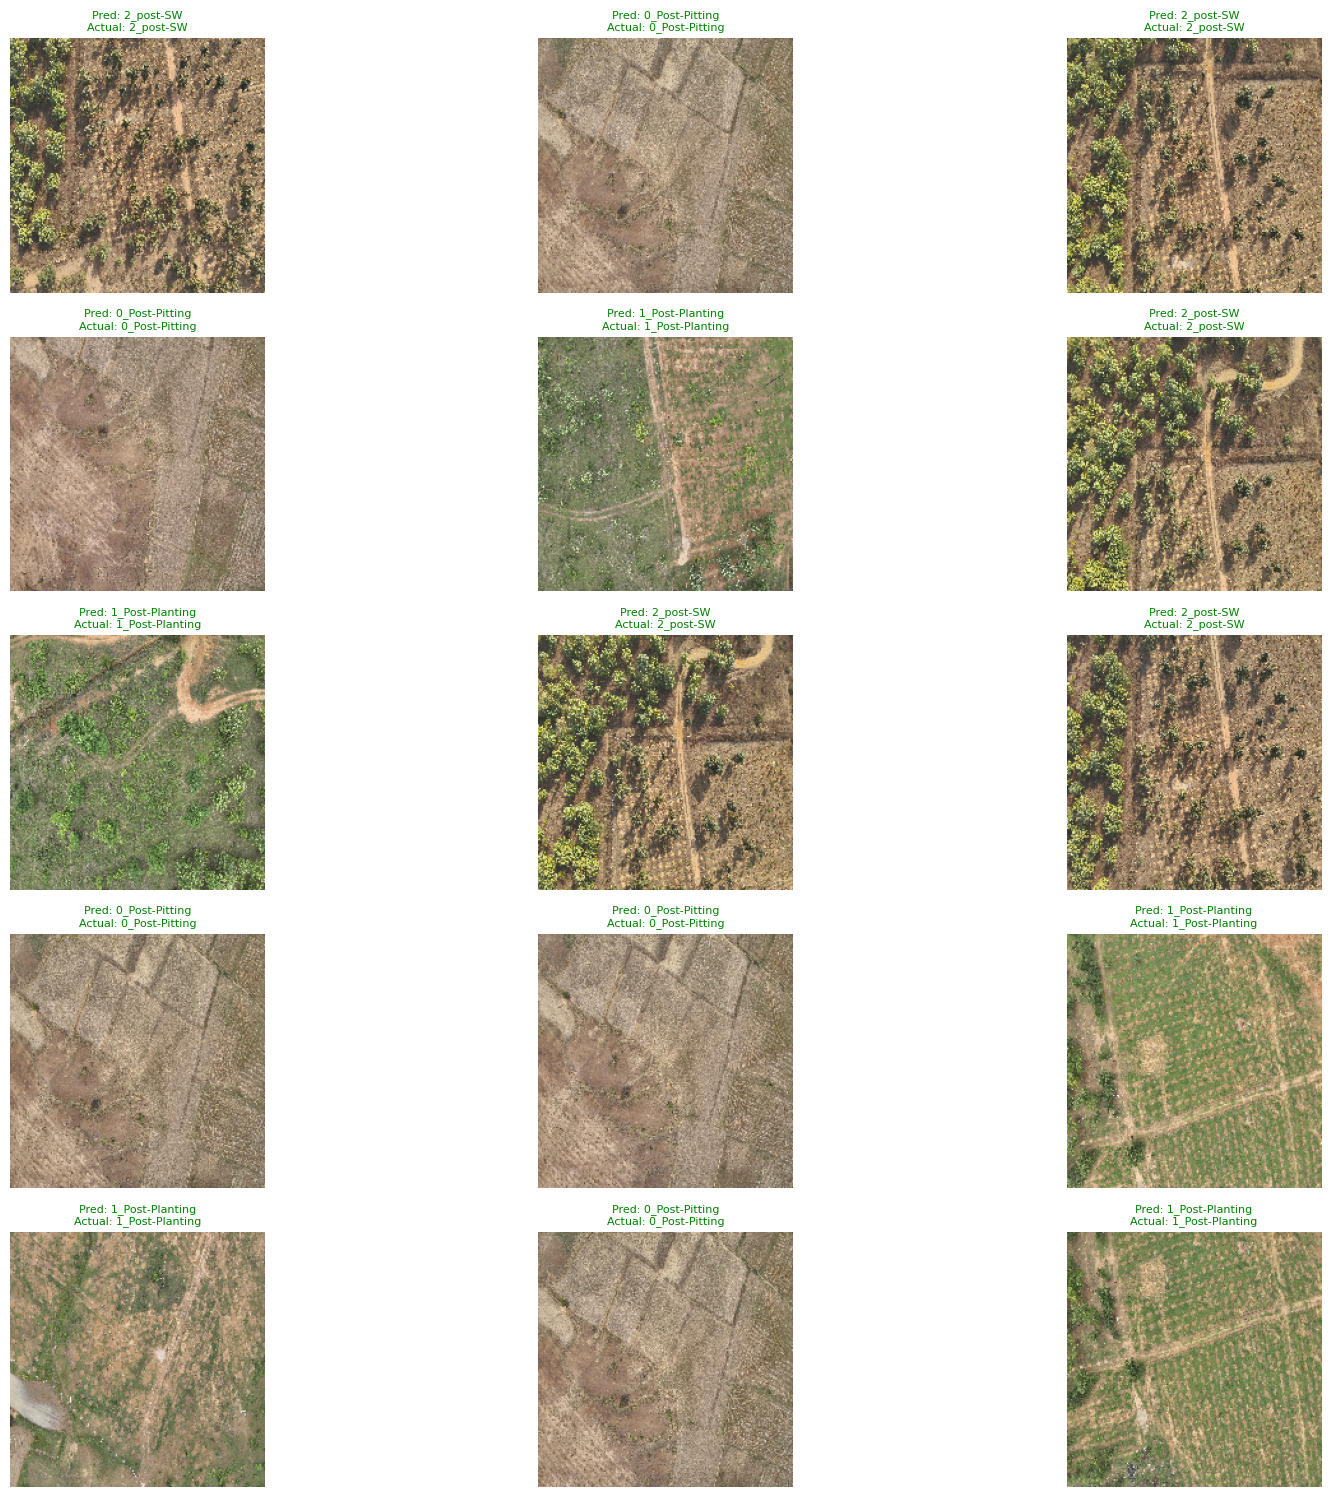

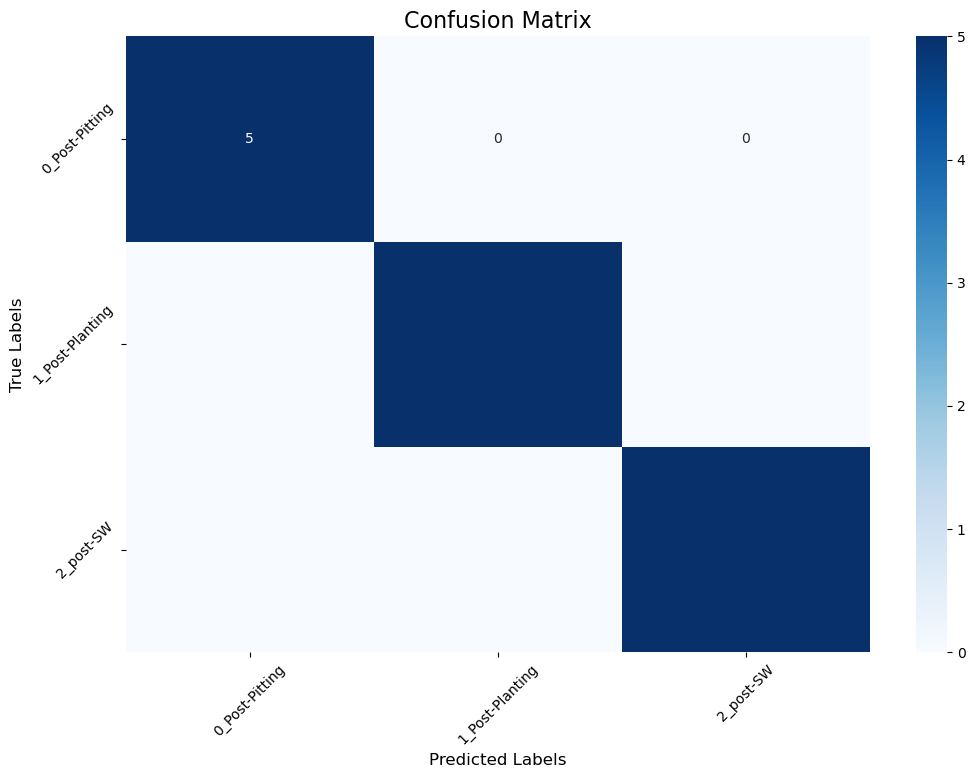

Classification Report:
                 precision    recall  f1-score   support

 0_Post-Pitting       1.00      1.00      1.00         5
1_Post-Planting       1.00      1.00      1.00         5
      2_post-SW       1.00      1.00      1.00         5

       accuracy                           1.00        15
      macro avg       1.00      1.00      1.00        15
   weighted avg       1.00      1.00      1.00        15



In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Define the dataset directory
test_dir = r"C:\Users\adarsh\Downloads\GREEN AI\PROJECT\FASHION-MNIST-CLASSIFICATION\tree_dataset\testing"

# Load the dataset (without preprocessing for visualization)
original_test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(200, 200),
    batch_size=50
)

# Save class names for later use
class_names = original_test_dataset.class_names

# Preprocess the dataset for model evaluation
def preprocess_image(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # Normalize image
    return image, label

test_dataset = original_test_dataset.map(preprocess_image).prefetch(tf.data.AUTOTUNE)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_dataset, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4%}")

# <---------------------- Visualize Predictions ---------------------->

plt.figure(figsize=(16, 30))
j = 1
for image_batch, label_batch in original_test_dataset.take(1):  # Use unprocessed dataset for visualization
    for i in range(min(30, len(image_batch))):  # Limit to 30 images for display
        plt.subplot(10, 3, j)
        image = image_batch[i].numpy().astype("uint8")  # Ensure the image is in displayable format
        prediction = model.predict(tf.expand_dims(image_batch[i] / 255.0, axis=0), verbose=0)  # Normalize for prediction
        predicted_class = np.argmax(prediction)
        actual_class = label_batch[i].numpy()

        # Highlight correct predictions in green and incorrect in red
        color = 'green' if predicted_class == actual_class else 'red'
        plt.imshow(image)
        plt.title(f"Pred: {class_names[predicted_class]}\nActual: {class_names[actual_class]}",
                  fontsize=8, color=color)
        plt.axis('off')
        j += 1
plt.tight_layout()
plt.show()

# <---------------------- Generate Predictions for Evaluation ---------------------->

y_pred = []
y_true = []
for image_batch, label_batch in test_dataset:
    predictions = model.predict(image_batch, verbose=0)
    y_pred.extend(np.argmax(predictions, axis=1))
    y_true.extend(label_batch.numpy())

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# <---------------------- Plot Confusion Matrix ---------------------->

plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

# <---------------------- Classification Report ---------------------->

print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

TESTING 2

Found 15 files belonging to 3 classes.
Test Loss: 0.0756
Test Accuracy: 100.0000%


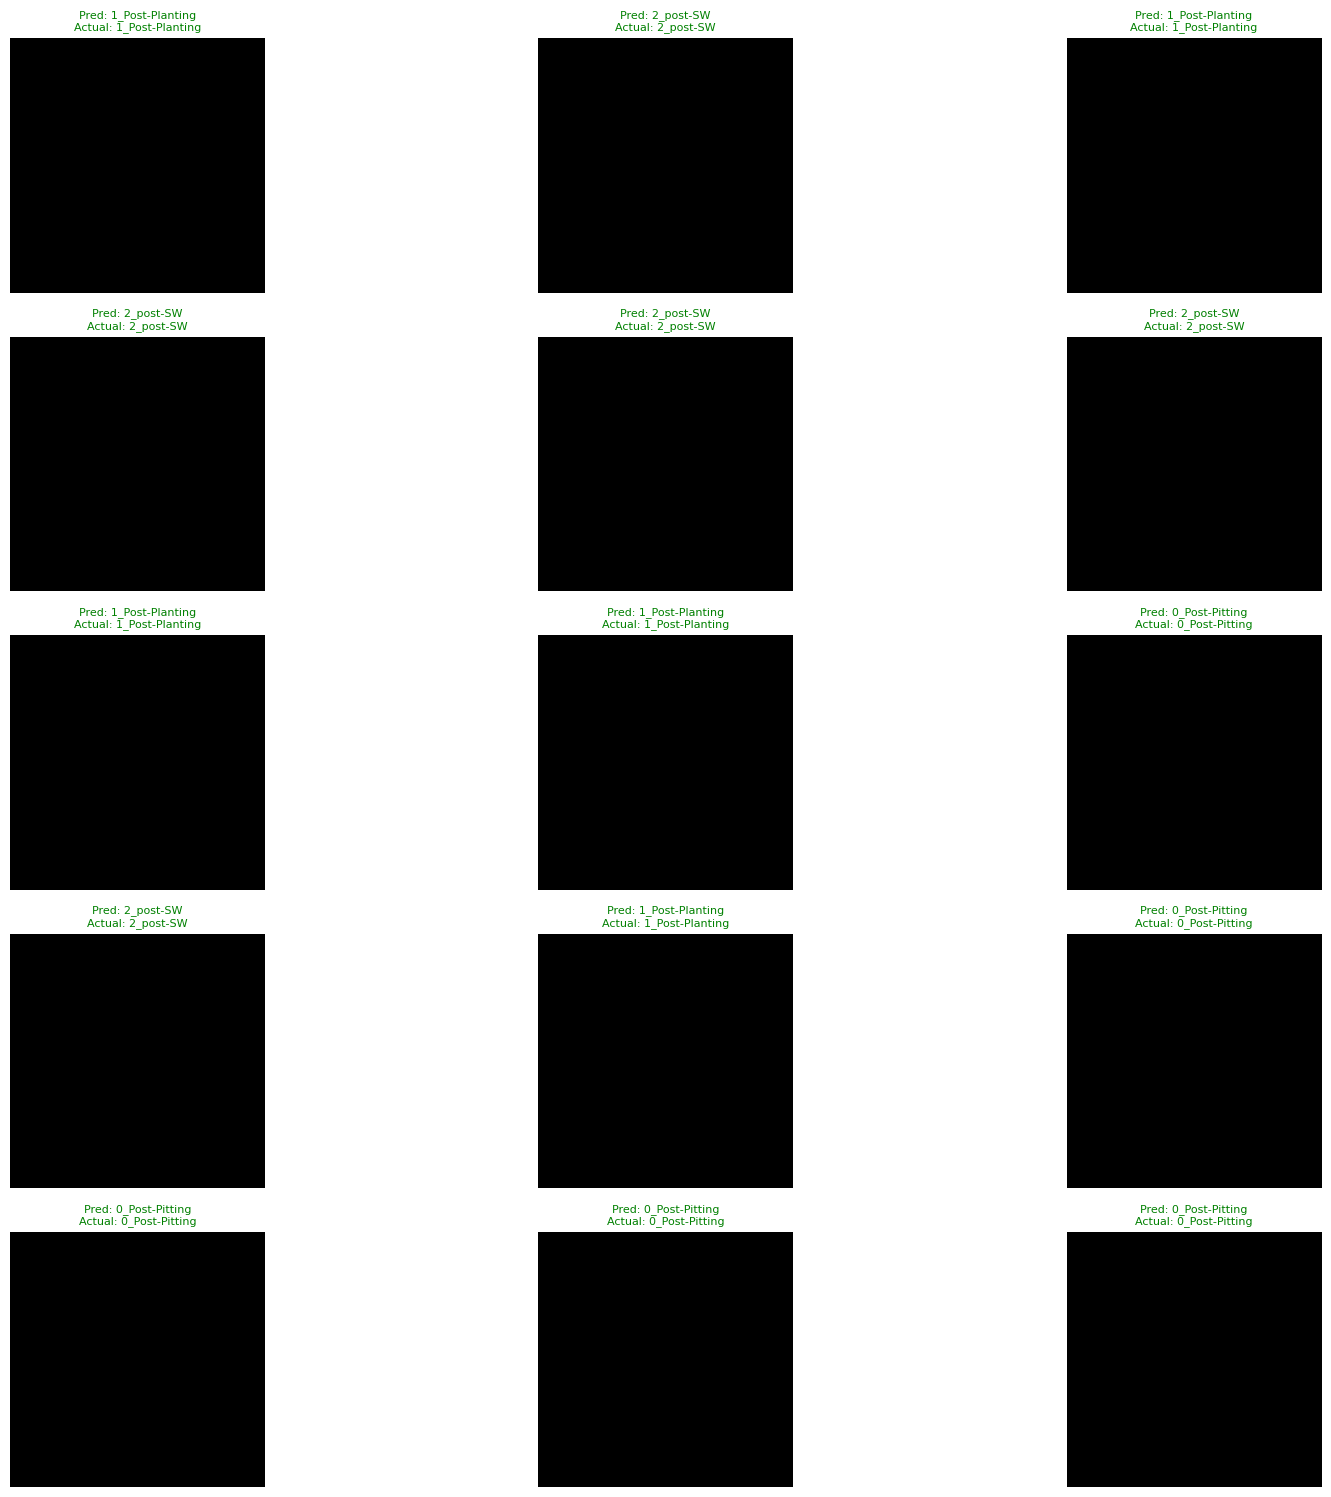

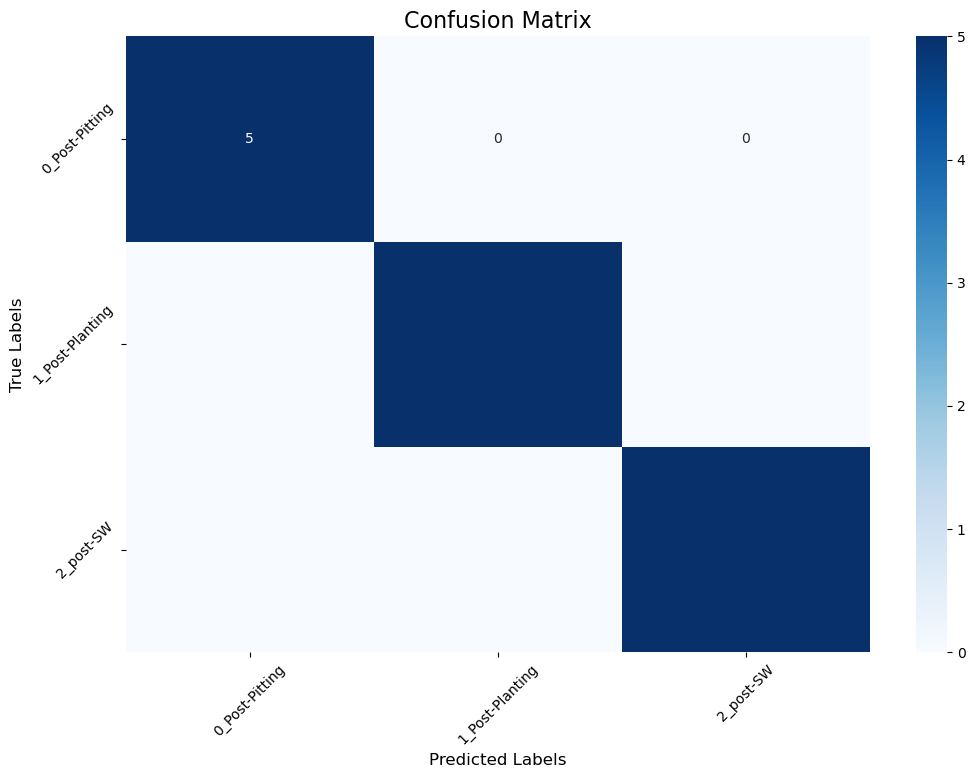

Classification Report:
                 precision    recall  f1-score   support

 0_Post-Pitting       1.00      1.00      1.00         5
1_Post-Planting       1.00      1.00      1.00         5
      2_post-SW       1.00      1.00      1.00         5

       accuracy                           1.00        15
      macro avg       1.00      1.00      1.00        15
   weighted avg       1.00      1.00      1.00        15



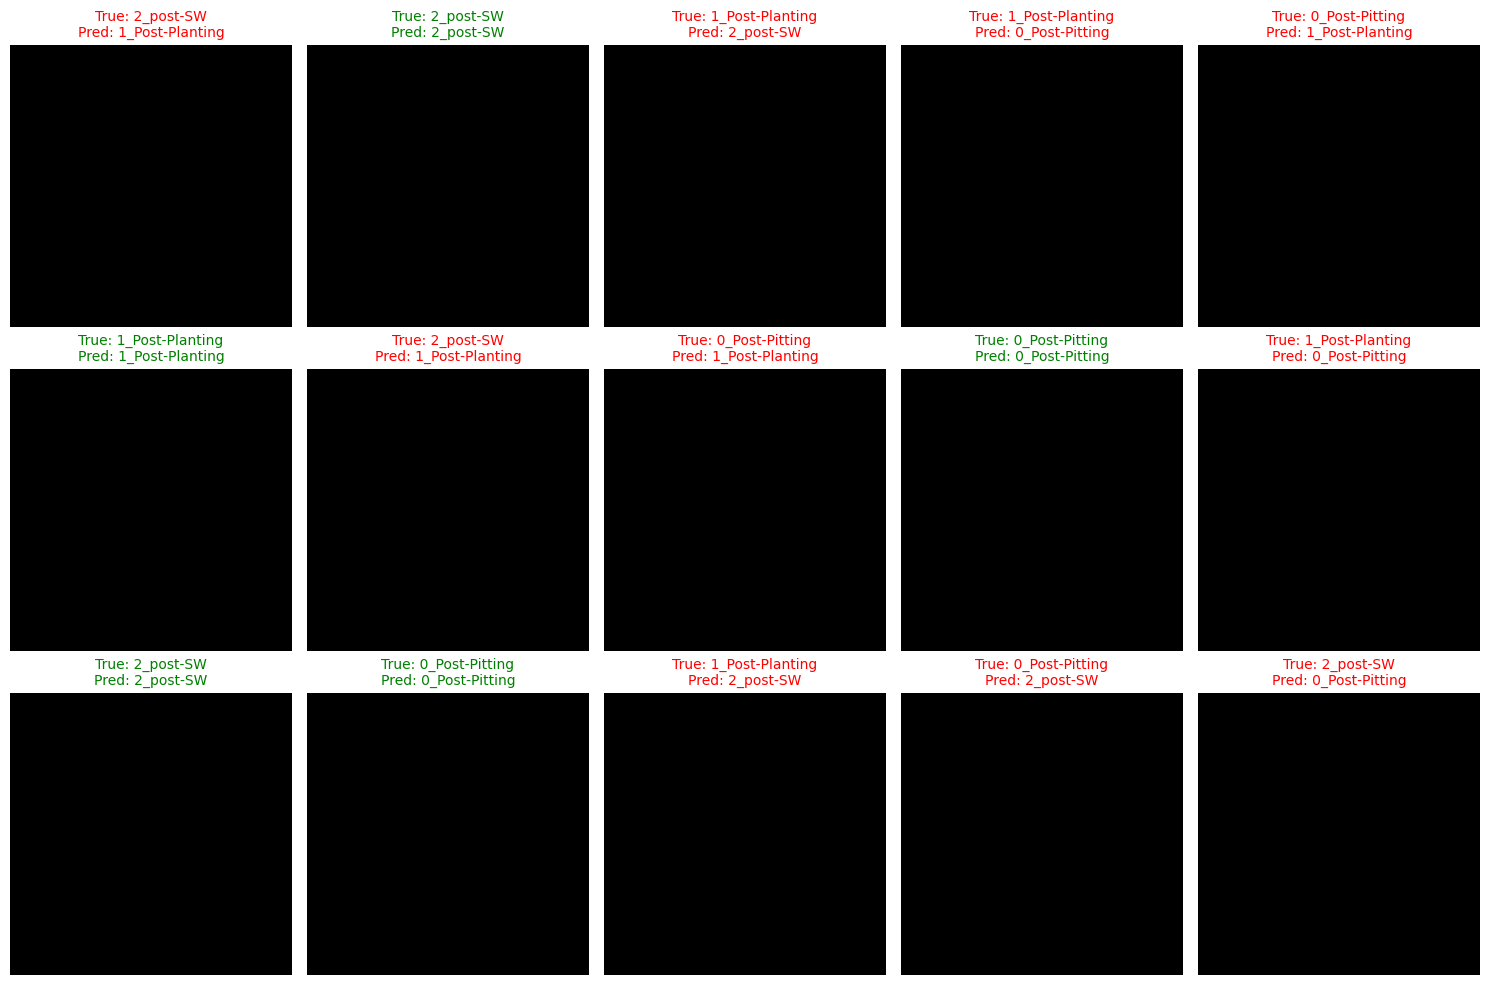

In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Define the dataset directory
test_dir = r"C:\Users\adarsh\Downloads\GREEN AI\PROJECT\FASHION-MNIST-CLASSIFICATION\tree_dataset\testing"

# Load the dataset
test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(200, 200),
    batch_size=50
)

# Save class names for later use
class_names = test_dataset.class_names

# Preprocess the dataset (define preprocess_image if needed)
test_dataset = test_dataset.map(preprocess_image).prefetch(tf.data.AUTOTUNE)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_dataset, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4%}")

# <---------------------- Visualize Predictions ---------------------->

plt.figure(figsize=(16, 30))
j = 1
for image_batch, label_batch in test_dataset.take(1):
    for i in range(min(30, len(image_batch))):  # Limit to 30 images for display
        plt.subplot(10, 3, j)
        image = image_batch[i].numpy().astype("uint8")
        prediction = model.predict(tf.expand_dims(image_batch[i], axis=0), verbose=0)
        predicted_class = np.argmax(prediction)
        actual_class = label_batch[i].numpy()

        # Highlight correct predictions in green and incorrect in red
        color = 'green' if predicted_class == actual_class else 'red'
        plt.imshow(image)
        plt.title(f"Pred: {class_names[predicted_class]}\nActual: {class_names[actual_class]}",
                  fontsize=8, color=color)
        plt.axis('off')
        j += 1
plt.tight_layout()
plt.show()

# <---------------------- Generate Predictions for Evaluation ---------------------->

y_pred = []
y_true = []
for image_batch, label_batch in test_dataset:
    predictions = model.predict(image_batch, verbose=0)
    y_pred.extend(np.argmax(predictions, axis=1))
    y_true.extend(label_batch.numpy())

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# <---------------------- Plot Confusion Matrix ---------------------->

plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

# <---------------------- Classification Report ---------------------->

print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# <---------------------- Improved Visualization: Compare Images ---------------------->

# Plot a grid of true vs predicted labels with images
num_images_to_display = 15  # Adjust the number of images to display
indices = np.random.choice(len(y_pred), size=num_images_to_display, replace=False)

plt.figure(figsize=(15, 10))
for i, idx in enumerate(indices):
    image = test_dataset.unbatch().skip(idx).take(1)  # Retrieve image and label by index
    for img, lbl in image:
        true_label = class_names[lbl.numpy()]
        predicted_label = class_names[y_pred[idx]]
        
        plt.subplot(3, 5, i + 1)  # Create a 3x5 grid for 15 images
        plt.imshow(img.numpy().astype("uint8"))
        color = 'green' if true_label == predicted_label else 'red'
        plt.title(f"True: {true_label}\nPred: {predicted_label}", fontsize=10, color=color)
        plt.axis('off')

plt.tight_layout()
plt.show()

TRAING DATA

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Define paths
train_dir = "tree_dataset/training"
val_dir = "tree_dataset/validation"

# Preprocess images
def preprocess_image(image, label):
    image = tf.image.resize(image, (200, 200)) / 255.0  # Resize and normalize
    return image, label

# Load datasets using tf.keras.utils.image_dataset_from_directory
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(200, 200),
    batch_size=50
)

val_dataset = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=(200, 200),
    batch_size=50
)

# Apply preprocessing and optimize pipeline
train_dataset = train_dataset.map(preprocess_image).shuffle(1000).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.map(preprocess_image).prefetch(tf.data.AUTOTUNE)

# Define CNN model
model = models.Sequential([
                         layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         layers.MaxPooling2D(pool_size=(2,2)),
                         layers.Conv2D(filters=128, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         layers.MaxPooling2D(pool_size=(2,2)),
                         layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         layers.MaxPooling2D(pool_size=(2,2)),
                         layers.Flatten(),
                         layers.Dense(units=128, activation='relu'),
                         layers.Dropout(0.25),
                         layers.Dense(units=256, activation='relu'),
                         layers.Dropout(0.5),
                         layers.Dense(units=256, activation='relu'),
                         layers.Dropout(0.25),                        
                         layers.Dense(units=128, activation='relu'),
                         layers.Dropout(0.10),                         
                         layers.Dense(units=10, activation='softmax')
                         ])


# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Print model summary
print(model.summary())

# Train the model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10
)


Found 683 files belonging to 3 classes.
Found 683 files belonging to 3 classes.


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 2, 2, 64)       │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 289,610 (1.10 MB)

 Trainable params: 289,610 (1.10 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "conv2d_5" is incompatible with the layer: expected axis -1 of input shape to have value 1, but received input with shape (None, 200, 200, 3)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 200, 200, 3), dtype=float32)
  • training=True
  • mask=None

TESTING 3

Found 15 files belonging to 3 classes.
Test Loss: 51.4557
Test Accuracy: 40.0000%


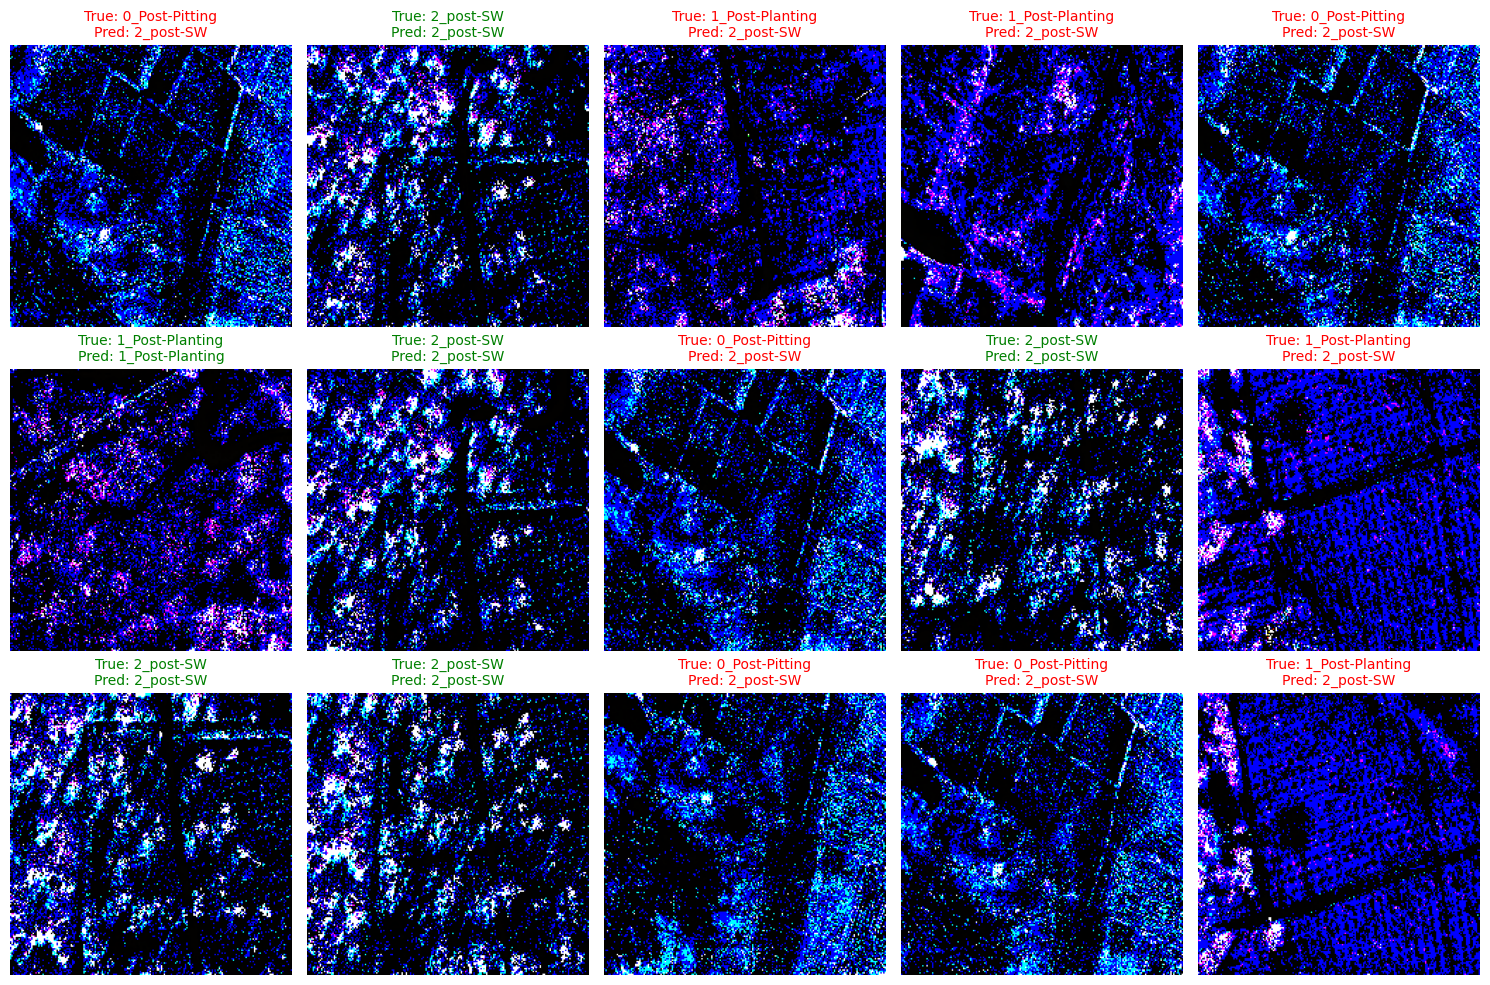

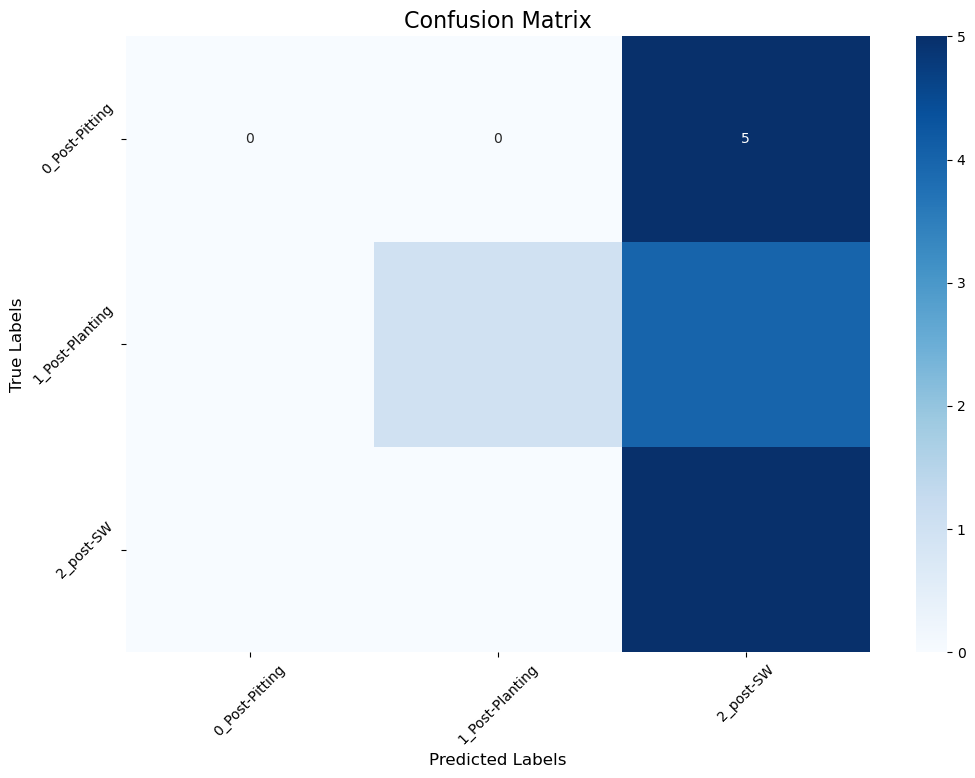

Classification Report:
                 precision    recall  f1-score   support

 0_Post-Pitting       0.00      0.00      0.00         5
1_Post-Planting       1.00      0.20      0.33         5
      2_post-SW       0.36      1.00      0.53         5

       accuracy                           0.40        15
      macro avg       0.45      0.40      0.29        15
   weighted avg       0.45      0.40      0.29        15



C:\Users\adarsh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\adarsh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\adarsh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Define the dataset directory
test_dir = r"C:\Users\adarsh\Downloads\GREEN AI\PROJECT\FASHION-MNIST-CLASSIFICATION\tree_dataset\testing"

# Load the dataset
test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(200, 200),
    batch_size=50
)

# Save the class names before preprocessing
class_names = test_dataset.class_names

# Preprocess the dataset (if required)
def preprocess_image(image, label):
    image = tf.image.per_image_standardization(image)  # Standardize images
    return image, label

test_dataset = test_dataset.map(preprocess_image).prefetch(tf.data.AUTOTUNE)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_dataset, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4%}")

# Visualize predictions grid
num_images_to_display = 15  # Adjust the number of images to display
y_pred = []
y_true = []
images_list = []

# Collect predictions and images
for image_batch, label_batch in test_dataset:
    predictions = model.predict(image_batch, verbose=0)
    y_pred.extend(np.argmax(predictions, axis=1))
    y_true.extend(label_batch.numpy())
    images_list.extend(image_batch.numpy())

# Convert to NumPy arrays
y_pred = np.array(y_pred)
y_true = np.array(y_true)
images_list = np.array(images_list)

# Randomly select indices for visualization
indices = np.random.choice(len(y_pred), size=num_images_to_display, replace=False)

plt.figure(figsize=(15, 10))
for i, idx in enumerate(indices):
    img = images_list[idx]
    true_label = class_names[y_true[idx]]
    predicted_label = class_names[y_pred[idx]]
    
    plt.subplot(3, 5, i + 1)  # Create a 3x5 grid for 15 images
    plt.imshow(img.astype("uint8"))
    color = 'green' if true_label == predicted_label else 'red'
    plt.title(f"True: {true_label}\nPred: {predicted_label}", fontsize=10, color=color)
    plt.axis('off')

plt.tight_layout()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

TESTING 4

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Define the dataset directory
test_dir = r"C:\Users\adarsh\Downloads\GREEN AI\PROJECT\FASHION-MNIST-CLASSIFICATION\tree_dataset\testing"

# Load the dataset
test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(200, 200),
    batch_size=50
)

# Save the class names before preprocessing
class_names = ["Alive", "Dead"]  # Ensure the directory matches these labels

# Preprocess the dataset
def preprocess_image(image, label):
    image = tf.image.per_image_standardization(image)  # Standardize images
    return image, label

test_dataset = test_dataset.map(preprocess_image).prefetch(tf.data.AUTOTUNE)

# Define or load your model
# If you have a pre-trained model saved, load it
# model = tf.keras.models.load_model('path_to_your_model')

# For demonstration purposes, I'll define a simple CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(200, 200, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')  # 2 classes: Alive, Dead
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# If you need to train the model, use this code
# model.fit(train_dataset, epochs=10)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_dataset, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4%}")

# Visualize predictions grid
num_images_to_display = 15  # Adjust the number of images to display
y_pred = []
y_true = []
images_list = []

# Collect predictions and images
for image_batch, label_batch in test_dataset:
    predictions = model.predict(image_batch, verbose=0)
    y_pred.extend(np.argmax(predictions, axis=1))
    y_true.extend(label_batch.numpy())
    images_list.extend(image_batch.numpy())

# Convert to NumPy arrays
y_pred = np.array(y_pred)
y_true = np.array(y_true)
images_list = np.array(images_list)

# Randomly select indices for visualization
indices = np.random.choice(len(y_pred), size=num_images_to_display, replace=False)

plt.figure(figsize=(15, 10))
for i, idx in enumerate(indices):
    img = images_list[idx]
    true_label = class_names[y_true[idx]]
    predicted_label = class_names[y_pred[idx]]
    
    # Calculate confidence score
    prediction_probs = model.predict(tf.expand_dims(img, axis=0), verbose=0)
    confidence = np.max(prediction_probs) * 100
    
    plt.subplot(3, 5, i + 1)  # Create a 3x5 grid for 15 images
    plt.imshow(img.astype("uint8"))
    
    # Add colored border for "Alive" (green) or "Dead" (red)
    ax = plt.gca()
    border_color = 'green' if true_label == predicted_label else 'red'
    ax.add_patch(Rectangle((0, 0), img.shape[1], img.shape[0], linewidth=5, edgecolor=border_color, facecolor='none'))
    
    # Add labels and confidence score
    color = 'green' if true_label == predicted_label else 'red'
    plt.title(
        f"True: {true_label}\nPred: {predicted_label}\nConf: {confidence:.2f}%",
        fontsize=10,
        color=color
    )
    plt.axis('off')

plt.tight_layout()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))


Found 15 files belonging to 3 classes.


C:\Users\adarsh\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\adarsh\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\Users\adarsh\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance

  File "C:\Users\adarsh\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start

  File "C:\Users\adarsh\anaconda3\Lib\site-packages\tornado\platform\asyncio.py", line 195, in start

  File "C:\Users\adarsh\anaconda3\Lib\asyncio\windows_events.py", line 321, in run_forever

  File "C:\Users\adarsh\anaconda3\Lib\asyncio\base_events.py", line 607, in run_forever

  File "C:\Users\adarsh\anaconda3\Lib\asyncio\base_events.py", line 1922, in _run_once

  File "C:\Users\adarsh\anaconda3\Lib\asyncio\events.py", line 80, in _run

  File "C:\Users\adarsh\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 534, in dispatch_queue

  File "C:\Users\adarsh\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 523, in process_one

  File "C:\Users\adarsh\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 429, in dispatch_shell

  File "C:\Users\adarsh\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 767, in execute_request

  File "C:\Users\adarsh\anaconda3\Lib\site-packages\ipykernel\ipkernel.py", line 429, in do_execute

  File "C:\Users\adarsh\anaconda3\Lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "C:\Users\adarsh\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3051, in run_cell

  File "C:\Users\adarsh\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3106, in _run_cell

  File "C:\Users\adarsh\anaconda3\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\adarsh\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3311, in run_cell_async

  File "C:\Users\adarsh\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3493, in run_ast_nodes

  File "C:\Users\adarsh\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code

  File "C:\Users\adarsh\AppData\Local\Temp\ipykernel_13256\106002611.py", line 50, in <module>

  File "C:\Users\adarsh\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\adarsh\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 429, in evaluate

  File "C:\Users\adarsh\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 165, in one_step_on_iterator

  File "C:\Users\adarsh\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 154, in one_step_on_data

  File "C:\Users\adarsh\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 85, in test_step

  File "C:\Users\adarsh\anaconda3\Lib\site-packages\keras\src\trainers\trainer.py", line 357, in _compute_loss

  File "C:\Users\adarsh\anaconda3\Lib\site-packages\keras\src\trainers\trainer.py", line 325, in compute_loss

  File "C:\Users\adarsh\anaconda3\Lib\site-packages\keras\src\trainers\compile_utils.py", line 609, in __call__

  File "C:\Users\adarsh\anaconda3\Lib\site-packages\keras\src\trainers\compile_utils.py", line 645, in call

  File "C:\Users\adarsh\anaconda3\Lib\site-packages\keras\src\losses\loss.py", line 43, in __call__

  File "C:\Users\adarsh\anaconda3\Lib\site-packages\keras\src\losses\losses.py", line 27, in call

  File "C:\Users\adarsh\anaconda3\Lib\site-packages\keras\src\losses\losses.py", line 1853, in sparse_categorical_crossentropy

  File "C:\Users\adarsh\anaconda3\Lib\site-packages\keras\src\ops\nn.py", line 1567, in sparse_categorical_crossentropy

  File "C:\Users\adarsh\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\nn.py", line 645, in sparse_categorical_crossentropy

Received a label value of 2 which is outside the valid range of [0, 2).  Label values: 2 0 2 0 1 1 1 1 2 2 1 0 0 0 2
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_535]